In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set(style="darkgrid")
sns.set(rc = {'figure.figsize':(15,10)})

In [3]:
FILE = 'data/regression_train.csv'
df = pd.read_csv(FILE)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,174000
1,80,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,135500
2,160,FV,NaN,5105,Pave,NaN,IR2,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,148800
3,20,RL,50.0,9405,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,118000
4,50,RL,78.0,10496,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,1,2007,WD,Normal,143000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1000 non-null   int64  
 1   MSZoning       1000 non-null   object 
 2   LotFrontage    830 non-null    float64
 3   LotArea        1000 non-null   int64  
 4   Street         1000 non-null   object 
 5   Alley          61 non-null     object 
 6   LotShape       1000 non-null   object 
 7   LandContour    1000 non-null   object 
 8   Utilities      1000 non-null   object 
 9   LotConfig      1000 non-null   object 
 10  LandSlope      1000 non-null   object 
 11  Neighborhood   1000 non-null   object 
 12  Condition1     1000 non-null   object 
 13  Condition2     1000 non-null   object 
 14  BldgType       1000 non-null   object 
 15  HouseStyle     1000 non-null   object 
 16  OverallQual    1000 non-null   int64  
 17  OverallCond    1000 non-null   int64  
 18  YearBuilt

In [5]:
TEST_FILE = 'data/regression_test.csv'

df_test = pd.read_csv(TEST_FILE)
df_test.info()

# Save test size for splitting to train / test later on
TEST_SIZE = df_test.shape[0]
print(TEST_SIZE)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     459 non-null    int64  
 1   MSZoning       459 non-null    object 
 2   LotFrontage    370 non-null    float64
 3   LotArea        459 non-null    int64  
 4   Street         459 non-null    object 
 5   Alley          30 non-null     object 
 6   LotShape       459 non-null    object 
 7   LandContour    459 non-null    object 
 8   Utilities      459 non-null    object 
 9   LotConfig      459 non-null    object 
 10  LandSlope      459 non-null    object 
 11  Neighborhood   459 non-null    object 
 12  Condition1     459 non-null    object 
 13  Condition2     459 non-null    object 
 14  BldgType       459 non-null    object 
 15  HouseStyle     459 non-null    object 
 16  OverallQual    459 non-null    int64  
 17  OverallCond    459 non-null    int64  
 18  YearBuilt 

Merge train and test while doing column operations.

In [6]:
df = pd.concat([df, df_test])

In [7]:
nan_cols = df.columns[df.isna().any()]
df.drop(columns=nan_cols, inplace=True)


In [8]:
print(df.columns[df.isna().any()])

Index([], dtype='object')


Plot correlation that has an abs val higher than 0.5

<AxesSubplot:>

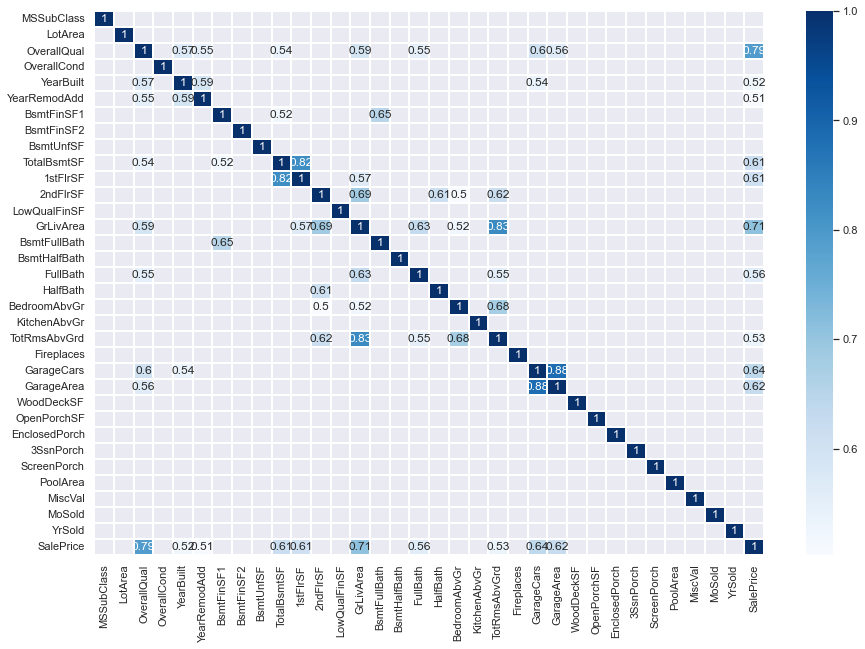

In [9]:
sns.heatmap(df.corr()[df.corr() >= 0.5], annot=True, cmap='Blues', linewidths=0.05)


Paris with high correlation (>.65):
- BsmtFinSF1 -> BsmtFullBath
- TotalBsmtSF -> 1stFlrSF
- 2ndFlrSF -> GrLivArea
- GrLivArea -> 1stFlrSF
- GrLivArea -> TotRmsAbvGrd
- BedroomAbvGr -> TotRmsAbvGrd
- TotRmsAbvGrd -> HalfBath
- GarageCars -> GarageArea

In [10]:
columns_to_del = ['BsmtFinSF1', '2ndFlrSF', '1stFlrSF', 'HalfBath', 'GarageCars']

df.drop(columns=columns_to_del, inplace=True)
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,3,2009,WD,Normal,174000
1,80,RL,9750,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,0,0,10,2006,WD,Normal,135500
2,160,FV,5105,Pave,IR2,Lvl,AllPub,FR2,Gtl,Somerst,...,0,0,0,0,0,3,2007,WD,Normal,148800
3,20,RL,9405,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,...,0,0,0,0,0,6,2009,WD,Normal,118000
4,50,RL,10496,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,0,0,1,2007,WD,Normal,143000


One hot encode the dataset

In [11]:
df_dummies = pd.get_dummies(df)

Done with column operations so split into train / test again

In [12]:
df_test = df_dummies.iloc[-TEST_SIZE:, :]
df = df_dummies.iloc[:-TEST_SIZE, :]

print(df.shape)
print(df_test.shape)

(1000, 211)
(459, 211)


Split to x and y

In [13]:
x_train, y_train = df.loc[:, df.columns!='SalePrice'], df.loc[:, 'SalePrice']
x_test, y_test = df_test.loc[:, df_test.columns!='SalePrice'], df_test.loc[:, 'SalePrice']

Plot model predictions compared to actual vals, measure score with r2

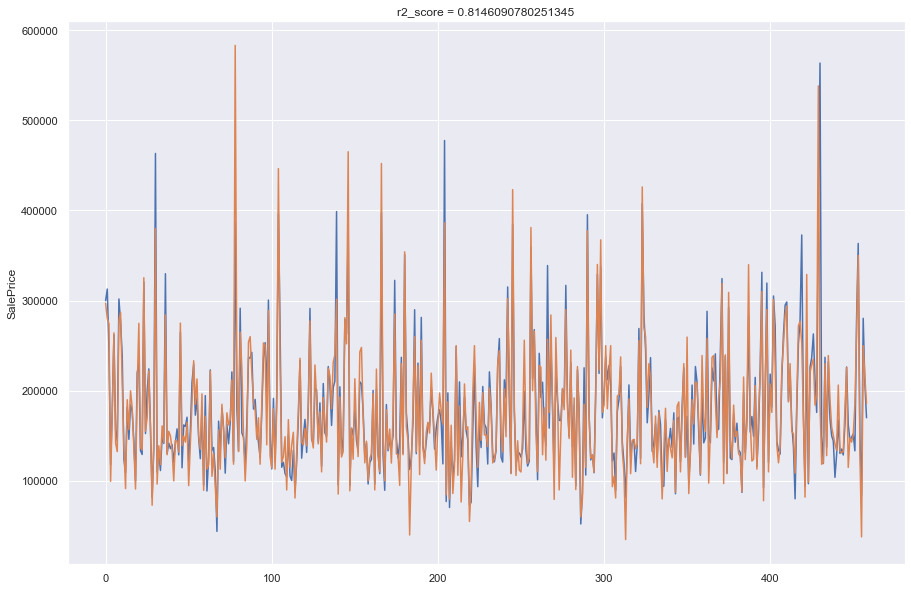

In [14]:
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from xgboost import XGBRegressor

model = XGBRegressor()

model.fit(x_train.values, y_train)
y_pred = model.predict(x_test.values)

sns.lineplot(x=range(len(y_test)), y=y_pred);
sns.lineplot(x=range(len(y_test)), y=y_test).set_title(f'r2_score = {r2_score(y_test, y_pred)}');


Part Two

Let't try:

- pick only features with high correlation towards saleprice
- encode string variables and evaluate correlation on them as well
- Use PCA to see it'f we need to strip features further
- use scaler
- normalize with log1p / exp1m

Merge train and test again for easier column operations

Set corr threshold for keeping features

In [206]:
TRAIN_DF = 'data/regression_train.csv'
TEST_DF = 'data/regression_test.csv'
CORR_THRESHOLD = 0.3

df = pd.concat([pd.read_csv(TRAIN_DF), pd.read_csv(TEST_DF)])
df.dropna(axis=1, inplace=True)

correlation_features = abs(df.corr()['SalePrice'])
high_corr_feats = correlation_features[correlation_features >= CORR_THRESHOLD]

Select non numerical values and encode. We've used pandas cat.codes
-check correlation and add those with higher corr than THRESH

C:\Users\andre\AppData\Local\Temp/ipykernel_576/1441081208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_numerical_cols['SalePrice'] = df.loc[:, 'SalePrice'].values
C:\Users\andre\AppData\Local\Temp/ipykernel_576/1441081208.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_numerical_cols[col] = non_numerical_cols[col].astype('category').cat.codes


<AxesSubplot:>

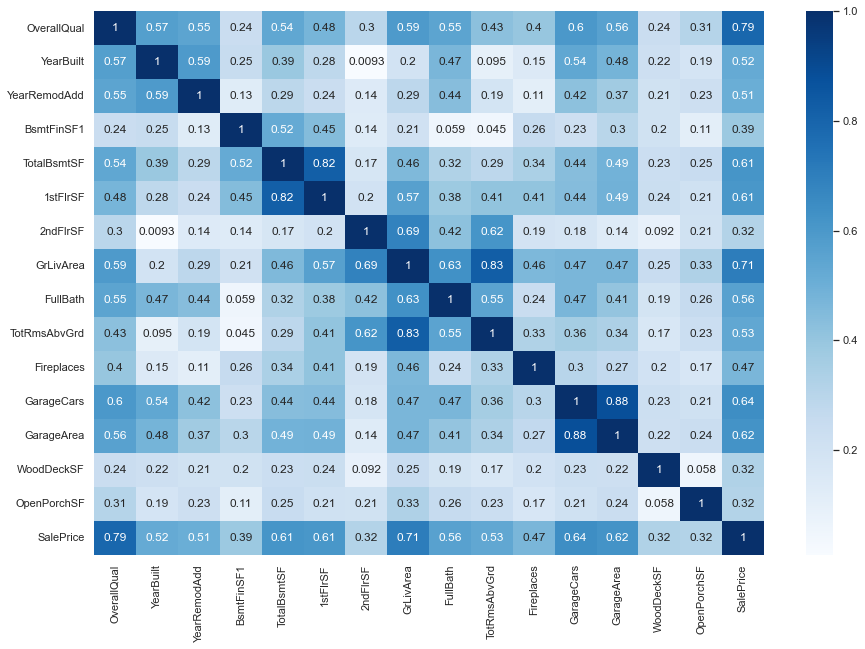

In [207]:
non_numerical_cols = df.select_dtypes('O')
non_numerical_cols['SalePrice'] = df.loc[:, 'SalePrice'].values

for col in non_numerical_cols:
    non_numerical_cols[col] = non_numerical_cols[col].astype('category').cat.codes

corr_feats_non_numerical = abs(non_numerical_cols.corr()['SalePrice'][:-1])
high_corr_non_numerical = corr_feats_non_numerical[corr_feats_non_numerical >= CORR_THRESHOLD]

high_corr_feats.append(high_corr_non_numerical)

df_selected = df[high_corr_feats.index.tolist()]

sns.heatmap(abs(df_selected.corr()), annot=True, cmap='Blues')

In [208]:
x_train, y_train = df_selected.iloc[:-TEST_SIZE, :-1], df_selected.iloc[:-TEST_SIZE, -1]
x_test, y_test = df_selected.iloc[-TEST_SIZE:, :-1], df_selected.iloc[-TEST_SIZE:, -1]

In [209]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Make a cross_val_score evaluation on several regressor to get an idea of good performing ones on this data

In [210]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, r2_score

scorer = make_scorer(r2_score)
models = [('LR', LinearRegression()), ('Lasso', Lasso()), ('ElasticNet', ElasticNet()), ('KNN', KNeighborsRegressor()), ('XGBOOST', XGBRegressor())]

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_res = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scorer)

    print(f'{name} - Score {cv_res.mean()}')

LR - Score 0.7528334457024324
Lasso - Score 0.752842931050324
ElasticNet - Score 0.7597952161892654
KNN - Score 0.8129113068739775
XGBOOST - Score 0.8358996800685243


Seems like KNN and XGBOOST shows good signs of handling this data well

In [211]:
def plot_explained_variance(train_data: pd.DataFrame, plot_range: int = 300, sum_range: int = 10) -> None:
    '''
    Plots the explained_variance for the range of 
    Args in: train_data - data to fit PCA
             plot_range - number of principal components to include in the sum of explained variances
             sum_range - number of principal compontens explained variances to sum and print
    Returns: None
    '''
    plot_range=min(x_train.shape)
    pca = PCA(plot_range)
    pca_full = pca.fit(train_data)

    print(f'Sum of the 10 most important features:{sum(pca_full.explained_variance_ratio_[:sum_range])}')

    plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
    plt.xlabel('# of components')
    plt.ylabel('Cumulative explained variance')
    plt.title("Amount of total variance included in the principal components")
    plt.show()

Plot pca variance ration, seems like we don't need to trim any more features.

Sum of the 10 most important features:0.9519099317658081


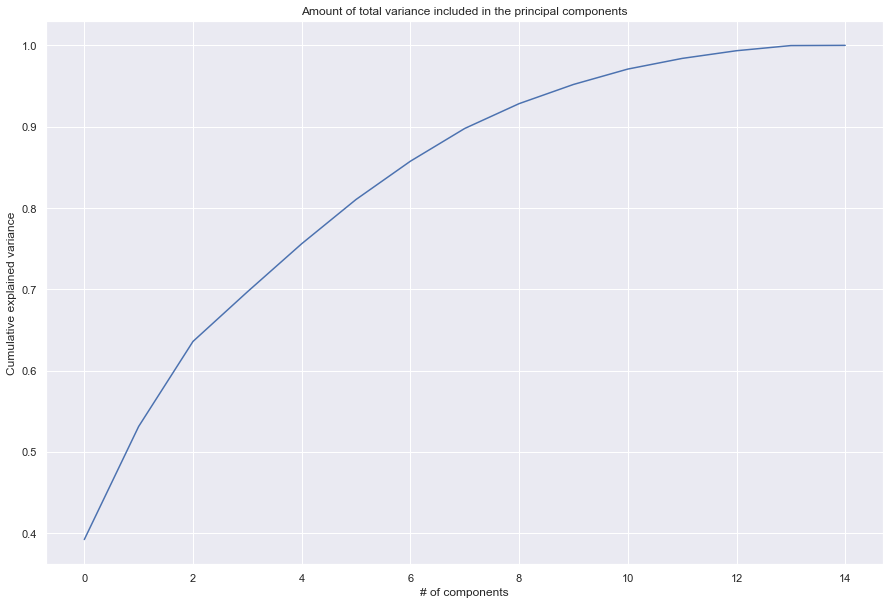

In [212]:
plot_explained_variance(x_train)

Visualize distribution, we've got a positive skew that we can correct with log1p

c:\Kod\Skolkod\applicerad_AI\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

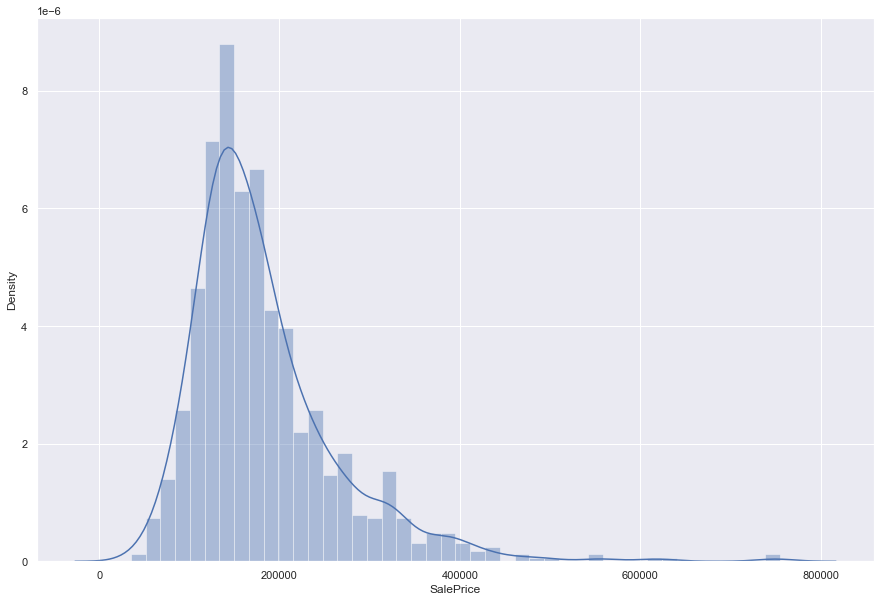

In [213]:
sns.distplot(y_train)

c:\Kod\Skolkod\applicerad_AI\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

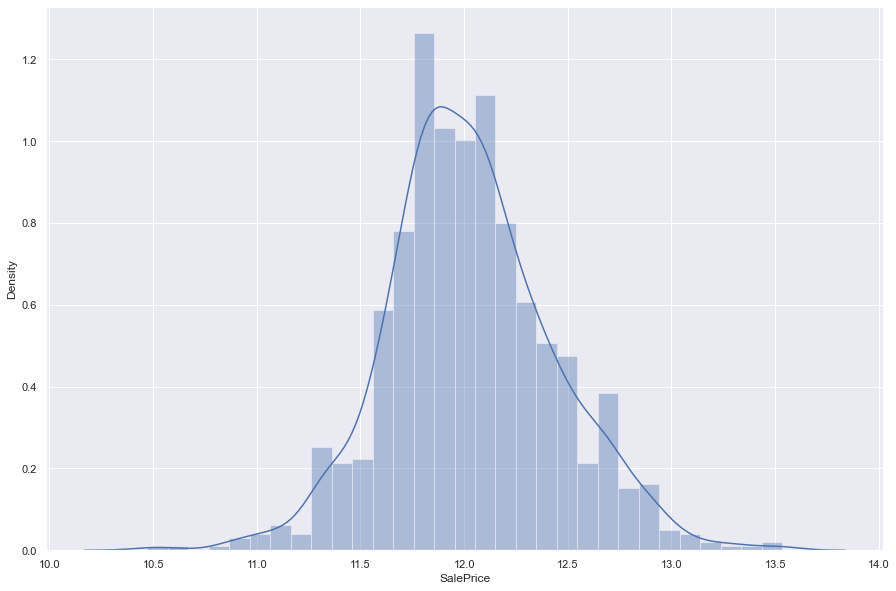

In [214]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)
sns.distplot(y_train)

Perform gridsearch on both models to find good params

In [200]:
from sklearn.model_selection import GridSearchCV

model = XGBRegressor()
knn_model = KNeighborsRegressor()

params = {    'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [10, 50, 100, 500]}
knn_params = {  'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
                'weights': ['uniform','distance'],
                'p':[1,2,5]}

grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1, scoring=scorer)
grid_search_knn = GridSearchCV(knn_model, knn_params, cv=5, n_jobs=-1, scoring=scorer)


In [201]:
grid_search.fit(x_train, y_train)
grid_search_knn.fit(x_train, y_train)

[10:25:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[10:25:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15],
                         'p': [1, 2, 5], 'weights': ['uniform', 'distance']},
             scoring=make_scorer(r2_score))

In [215]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search_knn.best_score_)
print(grid_search_knn.best_params_)

0.8668164282529119
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
0.8428141209211966
{'n_neighbors': 11, 'p': 1, 'weights': 'distance'}


Train and plot the models with best performing params

[10:32:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




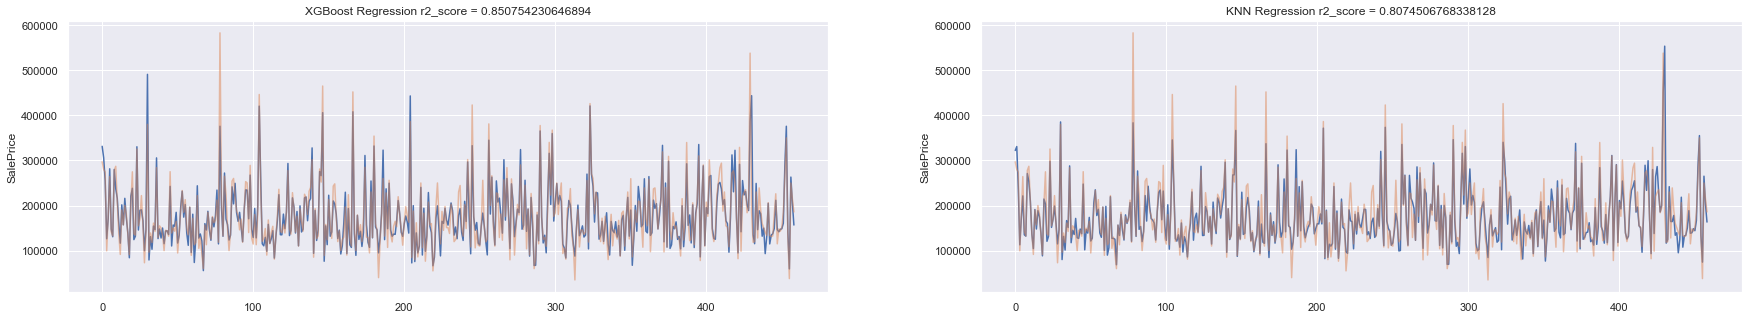

In [221]:

model = XGBRegressor(**grid_search.best_params_)
model_knn = KNeighborsRegressor(**grid_search_knn.best_params_)

model.fit(x_train, y_train)
model_knn.fit(x_train, y_train)

y_pred = np.expm1(model.predict(x_test))
y_pred_knn = np.expm1(model_knn.predict(x_test))

y_t = np.expm1(y_test)

_, ax = plt.subplots(1, 2, figsize=(30, 5))
sns.lineplot(x=range(len(y_t)), y=y_pred, ax=ax[0]);
ax[0].set_title(f'XGBoost Regression r2_score = {r2_score(y_t, y_pred)}')
sns.lineplot(x=range(len(y_t)), y=y_t, alpha=0.5, ax=ax[0]);

sns.lineplot(x=range(len(y_t)), y=y_pred_knn, ax=ax[1]);
ax[1].set_title(f'KNN Regression r2_score = {r2_score(y_t, y_pred_knn)}')
sns.lineplot(x=range(len(y_t)), y=y_t, alpha=0.5);

Try to improve further by removing outliers with sklearn toold LocalOutlierFactor.

unscaled then find outliers then scale again

There are 5.00 % outliers in the dataset
[10:34:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[10:34:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




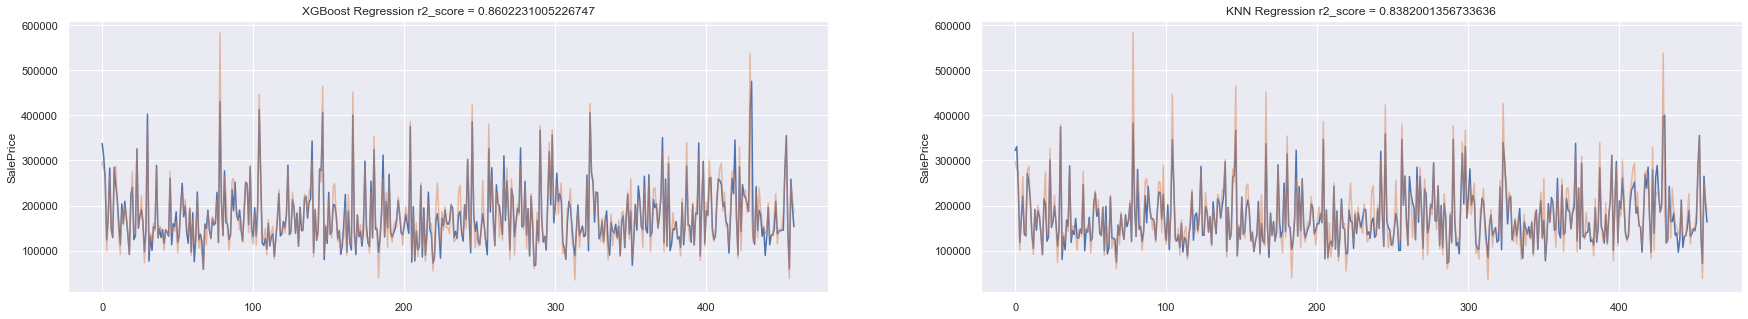

In [222]:
from sklearn.neighbors import LocalOutlierFactor

x_non_scaled_train = scaler.inverse_transform(x_train)
x_non_scaled_test = scaler.inverse_transform(x_test)

lof = LocalOutlierFactor()
outliers = lof.fit_predict(x_non_scaled_train)

mask = outliers != -1
print(f'There are {len(x_non_scaled_train[outliers == -1]) / len(x_non_scaled_train) * 100:.2f} % outliers in the dataset')

x_mask, y_mask = x_non_scaled_train[mask], y_train[mask]

x_scaled_train = scaler.fit_transform(x_mask)
x_scaled_test = scaler.transform(x_non_scaled_test)


model.fit(x_scaled_train, y_mask)
model_knn.fit(x_scaled_train, y_mask)
y_pred = model.predict(x_scaled_test)
y_pred_knn = model_knn.predict(x_scaled_test)

y_pred = np.expm1(y_pred)
y_pred_knn = np.expm1(y_pred_knn)

_, ax = plt.subplots(1, 2, figsize=(30, 5))

sns.lineplot(x=range(len(y_t)), y=y_pred, ax=ax[0]);
ax[0].set_title(f'XGBoost Regression r2_score = {r2_score(y_t, y_pred)}')
sns.lineplot(x=range(len(y_t)), y=y_t, alpha=0.5, ax=ax[0]);

sns.lineplot(x=range(len(y_t)), y=y_pred_knn, ax=ax[1]);
ax[1].set_title(f'KNN Regression r2_score = {r2_score(y_t, y_pred_knn)}')
sns.lineplot(x=range(len(y_t)), y=y_t, alpha=0.5);

Slight improvement on both models.